In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout


In [80]:
kernel = 'linear'
#df_studierende = pd.read_csv("df_studierende_complete.csv", sep = ";")
#cols = 30 # alle Attribute
df_studierende = pd.read_csv("df_studierende.csv", sep = ";") # ausgewählte Attribute
#cols = 5 # testen für nur ein Attribut 
cols = 7 # nur Attribute mit korrelation >0.2


In [81]:
def data(df, cols):
    if cols == 5:
        start = 4
    else:
        start = 0
    x, y = df.values[:, start:cols],df.values[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 3)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = data(df_studierende, cols)

In [82]:
def transform_data(x, y):
    sc_x=StandardScaler()
    sc_y=StandardScaler()
    
    
    y = y.reshape(len(y),1)
    
    #Sklalierung der Daten
    x=sc_x.fit_transform(x)
    y=sc_y.fit_transform(y)
    

    return x, y, sc_x, sc_y
x_train, y_train, sc_x, sc_y = transform_data(x_train, y_train)

In [83]:
def supvec_model_fit(x,y, kernel):
    model    = SVR(kernel=kernel, degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=True, max_iter=- 1)
    y = y.reshape(len(y))
    model.fit(x,y)
    
    return model
model = supvec_model_fit(x_train,y_train, kernel)

[LibSVM]

In [84]:
def pred_vec(model, x_test, sc_x, sc_y):
    #test = np.array([0,0,17,1,1,0,2,4,3,4,2,1,1,3,0,0,1,0,0,1,1,1,1,4,4,3,1,1,5,0])
    #test = test.reshape(1,len(test))
    #y_pred = model.predict(test)
    y_pred = model.predict(sc_x.transform(x_test))
  
    y_pred = sc_y.inverse_transform(y_pred)
    
    return y_pred
y_pred = pred_vec(model,x_test, sc_x, sc_y)

In [85]:
def MSE(model, x_train, y_train):
    print(f'Der durchschnittliche Quadratische Fehler ist: {mean_squared_error(y_test, y_pred)}')
    MSE = mean_squared_error(y_test, y_pred)
    return MSE
MSE = MSE(model, x_train, y_train)

Der durchschnittliche Quadratische Fehler ist: 6.83423308015594


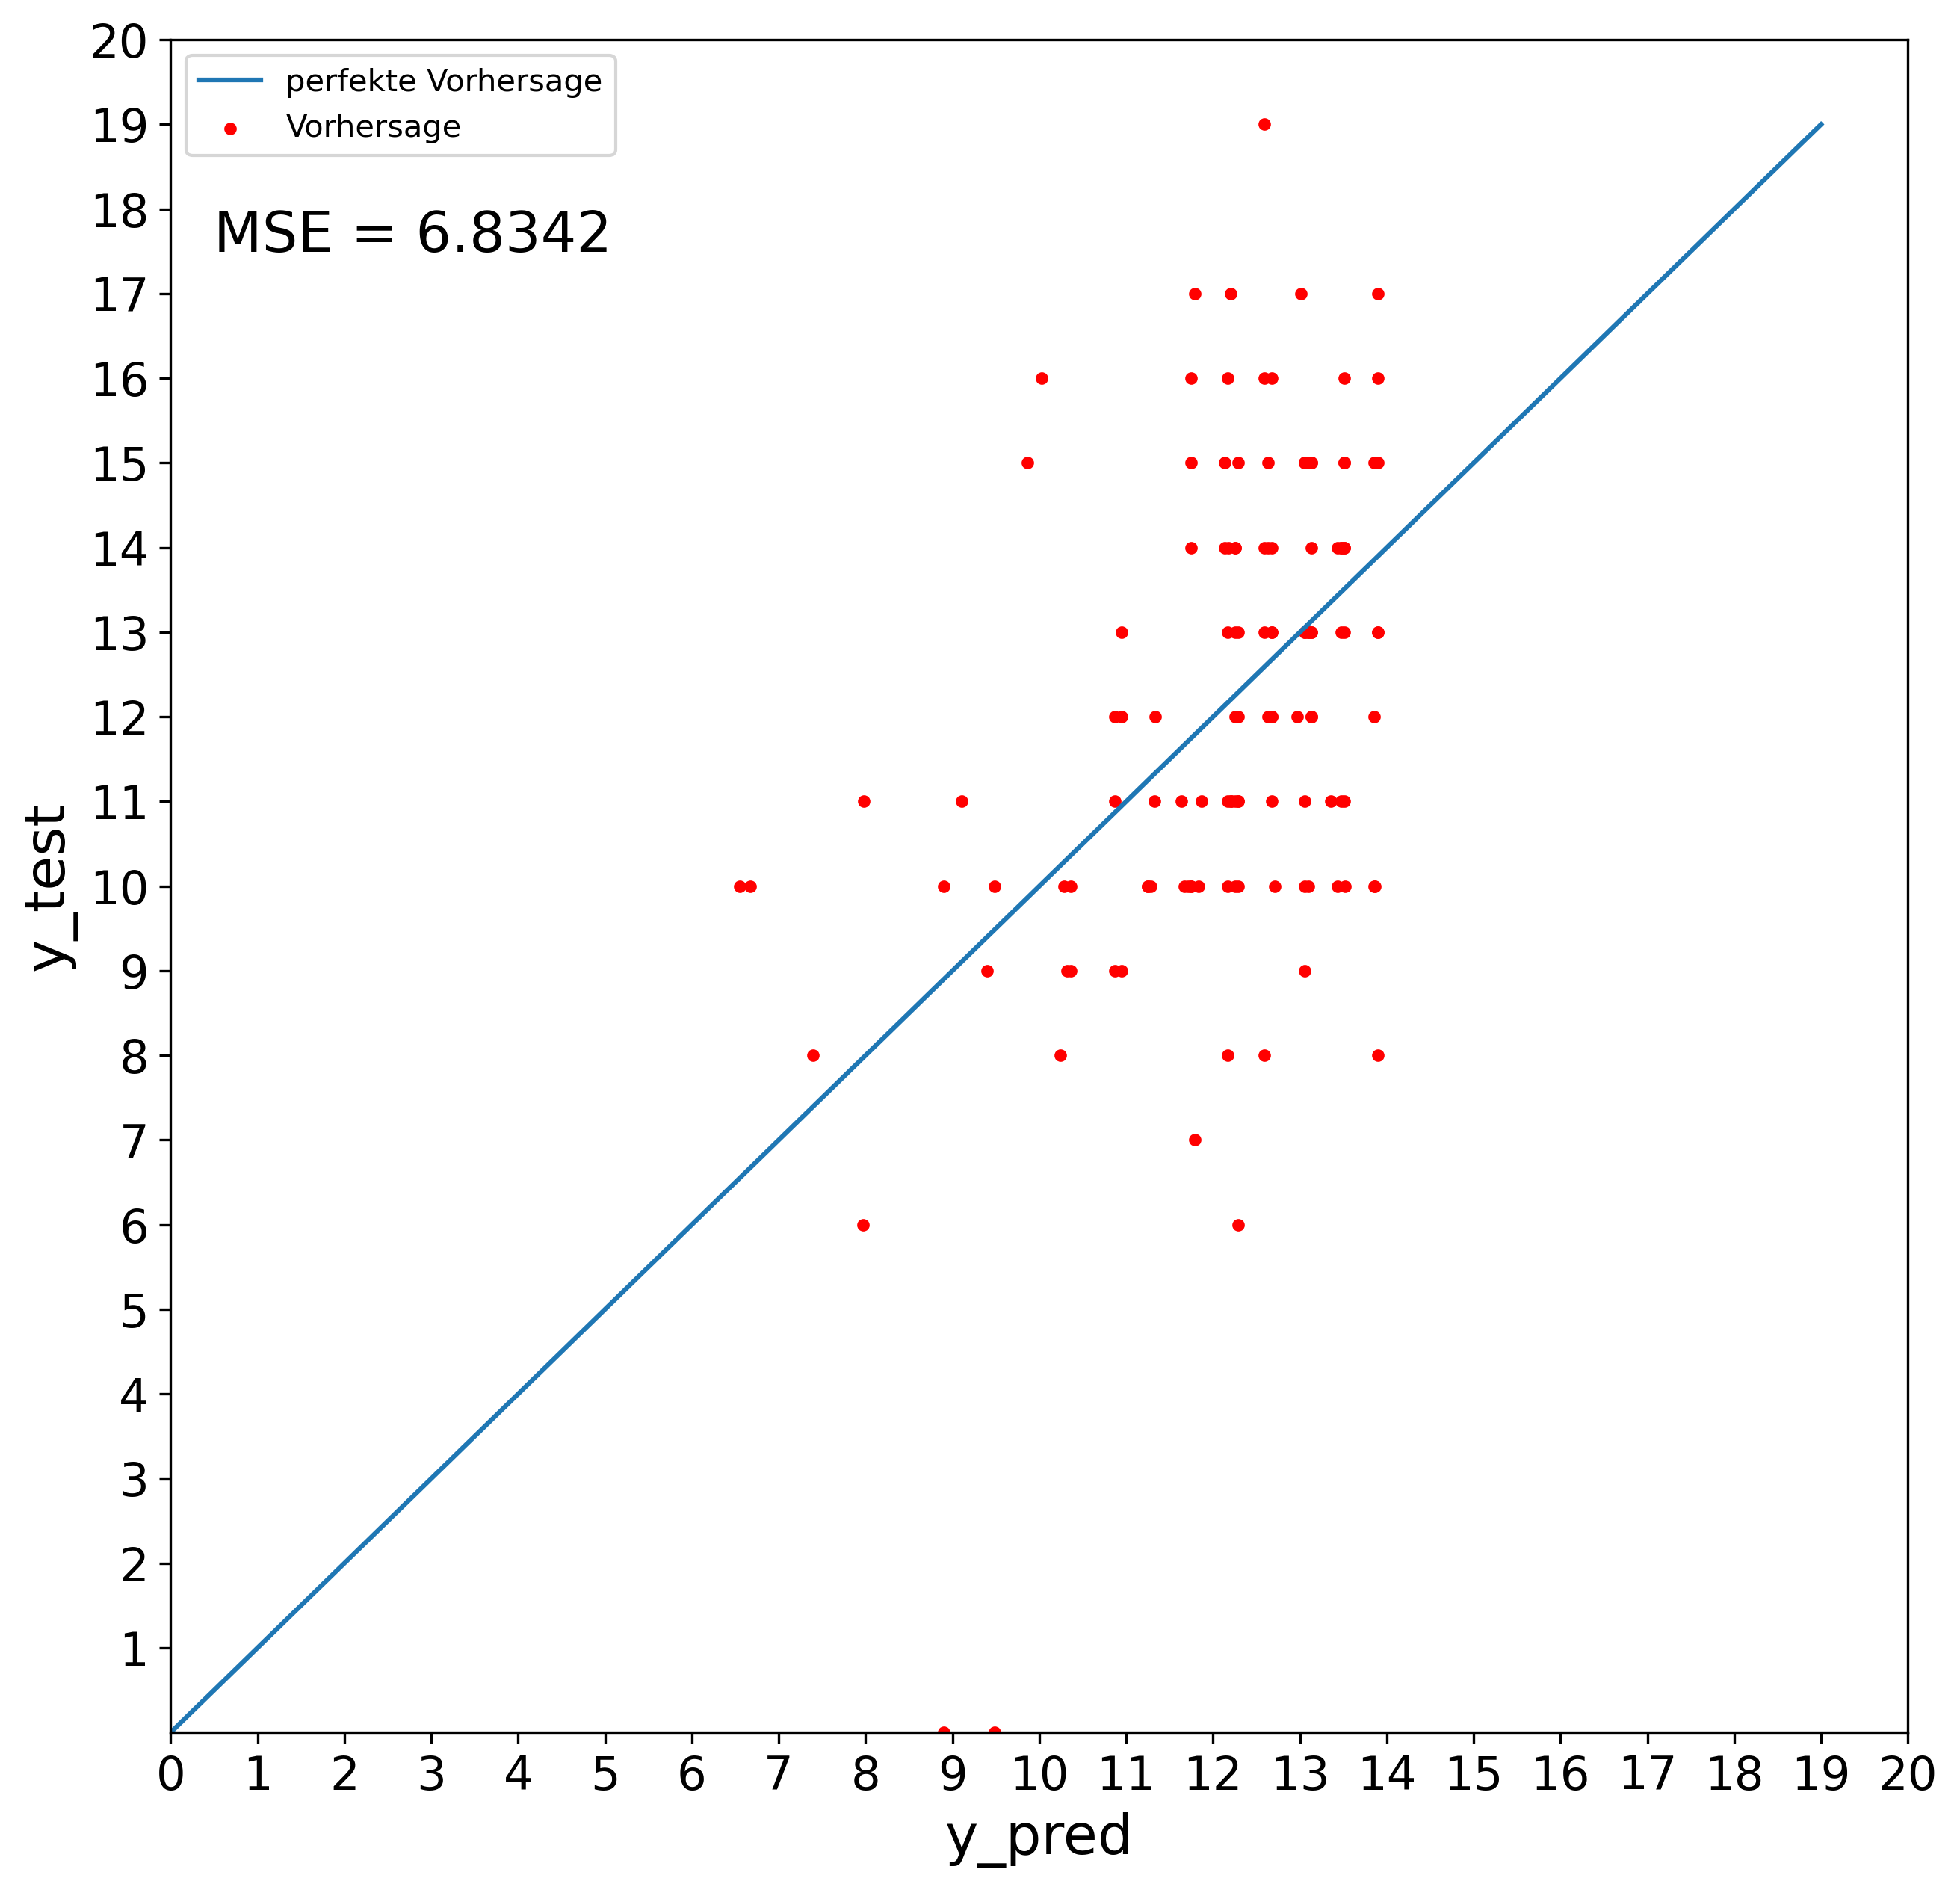

In [86]:
def plot(y_pred,y_test, model, MSE):
     
    ticks = [i for i in range(0,20+1)]

    plt.figure(dpi=300)
    plt.rcParams["figure.figsize"] = (10,10)
    #plt.title('SVR - linear, mit ausgewählten Attributen', fontsize = 18)
    plt.plot(range(20),range(20))
    plt.text(0.5,17.5,'MSE = '+ str(round(MSE,4)), fontsize = 18)
    plt.scatter(y_pred, y_test, marker ='.', color = 'r')
    plt.legend(['perfekte Vorhersage','Vorhersage'])
    plt.xlabel('y_pred',fontsize=18)
    plt.xticks(ticks,fontsize=15)
    plt.ylabel('y_test',fontsize=18)
    plt.yticks(ticks,fontsize=15)
    plt.ylim(0.001,20)
    plt.xlim(0,20)
    plt.show()

    return
plot(y_pred,y_test, model, MSE)

In [87]:
#nur Attribute mit höchster Korrelation
if cols == 5:
    def eval_plot(model, sc_x, sc_y, x_test,y_test,y_pred, kernel):
        eval_poly = np.arange(0,3,0.01)
        eval_poly = eval_poly.reshape(len(eval_poly),1)
        pred =model.predict(sc_x.transform(eval_poly))
        pred = sc_y.inverse_transform(pred)
    
        plt.figure(dpi = 300)
        plt.title(kernel + ' - kernel', fontsize = 20)
        plt.xlabel('failures',fontsize=18)
        plt.ylabel('finale score',fontsize=18)
    
        plt.plot(x_test,y_test, '.r')
        plt.plot(eval_poly, pred)
        plt.legend(['data','prediction'], fontsize = 20)
        plt.show()
        return
    eval_plot(model, sc_x, sc_y,x_test,y_test,y_pred, kernel)

In [88]:
style = {'description_width': 'initial'}
school = widgets.Dropdown(
    options=[('Gabriela Pereira School', 0), ('Mousinho da Silveira', 1)],
    description='Auf welche Schule gehen Sie?',
    style =style,
    layout = Layout(width='50%')
)

Medu = widgets.Dropdown(
    options=[('keine', 0), ('Grundschule', 1), ('Mittlere Reife', 2), ('Abitur', 3), ('höhere Ausbildung', 4)],
    description='Welchen Ausbildungsgrad hat Ihre Mutter?',
    style =style,
    layout = Layout(width='50%')
)

Fedu = widgets.Dropdown(
    options=[('keine', 0), ('Grundschule', 1), ('Mittlere Reife', 2), ('Abitur', 3), ('höhere Ausbildung', 4)],
    description='Welchen Ausbildungsgrad hat Ihr Vater?',
    style =style,
    layout = Layout(width='50%')
)

studytime = widgets.Dropdown(
    options=[('weniger als 2 Stunden', 1), ('2 bis 5 Stunden', 2), ('5 bis 10 Stunden', 3), ('mehr als 10 Stunden', 4)],
    description='Wieviel lernen Sie im Schnitt in der Woche?',
    style =style,
    layout = Layout(width='50%')
)

failures = widgets.Dropdown(
    options=[('0', 0), ('1', 1), ('2', 2), ('3', 3), ('>4', 4)],
    description='Wie oft sind Sie bereits durch den Kurs durchgefallen?',
    style =style,
    layout = Layout(width='50%')
)

higher = widgets.Dropdown(
    options=[('Ja', 1), ('Nein', 2)],
    description='Streben Sie eine höhere Ausbildung an?',
    style =style,
    layout = Layout(width='50%')
)

Dalc = widgets.Dropdown(
    options=[('sehr wenig', 1), ('wenig', 2), ('normal', 3), ('viel', 4), ('sehr viel', 5)],
    description='Täglicher Alkoholkonsum:',
    style =style,
    layout = Layout(width='50%')
)

In [89]:
def data(school, Medu, Fedu, studytime, failures, higher, Dalc):
    data = []
    data.append(school)
    data.append(Medu)
    data.append(Fedu)
    data.append(studytime) 
    data.append(failures)
    data.append(higher)
    data.append(Dalc)
    data = np.array(data)
    data = data.reshape(1,len(data))
    y_pred = pred_vec(model,data,sc_x,sc_y)
    print(f'Mit Ihren Angaben erreichen Sie am Ende des Schuljahres eine Punktzahl von {y_pred}')
    return 

In [90]:
if cols == 7:
    interact(data, school = school, Medu = Medu, Fedu = Fedu, studytime = studytime, failures = failures, higher = higher, Dalc = Dalc);


interactive(children=(Dropdown(description='Auf welche Schule gehen Sie?', layout=Layout(width='50%'), options…